In [5]:
import cv2
import numpy as np
from keras.layers import  MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D, BatchNormalization, AveragePooling2D, Input, Conv2D, UpSampling2D
from keras.layers import Convolution2D
from keras.models import Sequential, load_model, Model
import pickle
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
import keras

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

# Import paths from config file
from config import (
    NOISE_X_PATH, CLEAN_Y_PATH,
    MODEL_PATH, HISTORY_PATH,
    TEST_IMAGE_PATH_1, TEST_IMAGE_PATH_2
)

# Load .npy files
noise_X = np.load(NOISE_X_PATH)
clean_Y = np.load(CLEAN_Y_PATH)

# Normalize
noise_X = noise_X.astype('float32') / 255.0
clean_Y = clean_Y.astype('float32') / 255.0

# Shuffle
indices = np.arange(noise_X.shape[0])
np.random.shuffle(indices)
noise_X = noise_X[indices]
clean_Y = clean_Y[indices]

# Split
X_train, X_test, y_train, y_test = train_test_split(noise_X, clean_Y, test_size=0.2)

# Check shapes
print(noise_X.shape)
print(clean_Y.shape)


(300, 256, 256, 3)
(300, 256, 256, 3)


In [2]:
import os
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.callbacks import ModelCheckpoint

# Import model paths from config
from config import MODEL_PATH, HISTORY_PATH

# Define model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    Conv2D(3, (3, 3), activation='sigmoid', padding='same')  # Output has 3 channels like input
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train or load model
if not os.path.exists(MODEL_PATH):
    model_check_point = ModelCheckpoint(filepath=MODEL_PATH, verbose=1, save_best_only=True)
    hist = model.fit(
        X_train, y_train,
        batch_size=32,
        epochs=300,
        validation_data=(X_test, y_test),
        callbacks=[model_check_point],
        verbose=1
    )
    
    with open(HISTORY_PATH, 'wb') as f:
        pickle.dump(hist.history, f)
else:
    model.load_weights(MODEL_PATH)


C:\Users\aayus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\aayus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


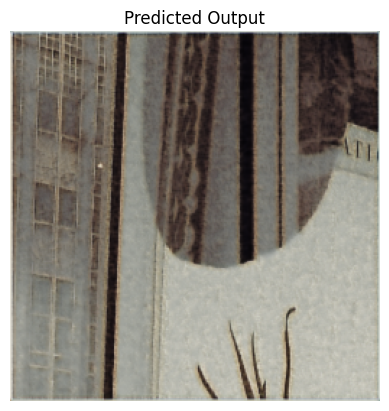

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Import test image path from config
from config import TEST_IMAGE_PATH_1

# Read the image
test = cv2.imread(TEST_IMAGE_PATH_1)

# Check if the image loaded successfully
if test is None:
    print("Error: Image could not be loaded. Check the path in config.py.")
else:
    test = cv2.resize(test, (256, 256))

    # Preprocess
    temp = [test]
    test = np.asarray(temp).astype('float32') / 255.0

    # Predict
    predict = model.predict(test)[0]

    # Post-process for display
    predict = cv2.resize(predict, (256, 256))
    predict = cv2.cvtColor(predict, cv2.COLOR_BGR2RGB)

    # Show result
    plt.imshow(predict)
    plt.axis('off')
    plt.title("Predicted Output")
    plt.show()


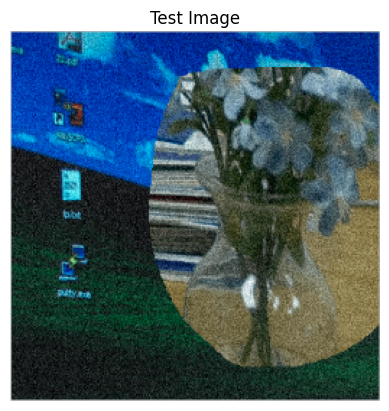

In [4]:
import cv2
import matplotlib.pyplot as plt

# Import test image path from config
from config import TEST_IMAGE_PATH_2

# Read and process image
test = cv2.imread(TEST_IMAGE_PATH_2)
test = cv2.resize(test, (256, 256))
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(test)
plt.axis('off')
plt.title("Test Image")
plt.show()


In [9]:
import random
import numpy as np

def add_noise(img):
    """
    Adds random white and black pixel noise to an image.
    Works for both grayscale and RGB images.
    """
    # Ensure it's a NumPy array
    img = np.array(img, copy=True)

    # Handle grayscale vs RGB
    if len(img.shape) == 2:  # Grayscale
        row, col = img.shape
        channels = None
    else:  # Color image
        row, col, channels = img.shape

    # Add white pixels
    number_of_pixels = random.randint(300, 10000)
    for _ in range(number_of_pixels):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, col - 1)
        if channels:  # Color
            img[y_coord, x_coord] = [255] * channels
        else:  # Grayscale
            img[y_coord, x_coord] = 255

    # Add black pixels
    number_of_pixels = random.randint(300, 10000)
    for _ in range(number_of_pixels):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, col - 1)
        if channels:  # Color
            img[y_coord, x_coord] = [0] * channels
        else:  # Grayscale
            img[y_coord, x_coord] = 0

    return img


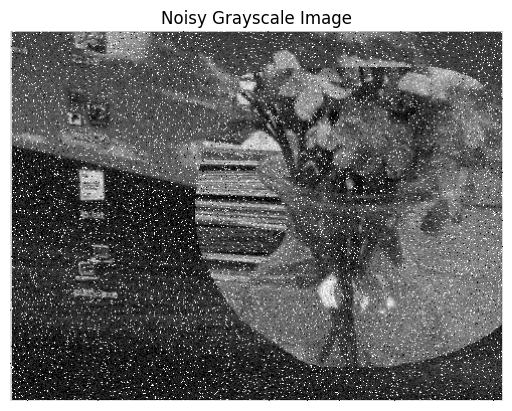

In [7]:
import cv2
import matplotlib.pyplot as plt
from config import TEST_IMAGE_PATH_2  # Assuming this points to 04.png

# Load grayscale image safely
img = cv2.imread(TEST_IMAGE_PATH_2, 0)

# Add noise (assuming add_noise function is defined)
img = add_noise(img)

# Display the grayscale noisy image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Noisy Grayscale Image")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


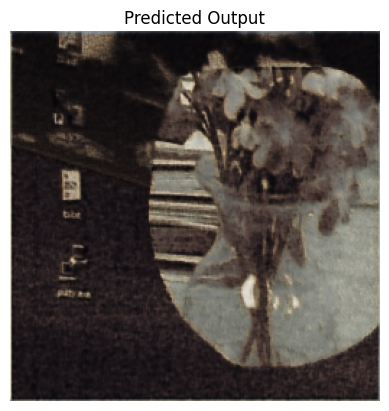

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from config import TEST_IMAGE_PATH_2  # Path to '02.png' or any test image

# Load the existing test image
test = cv2.imread(TEST_IMAGE_PATH_2)
test = cv2.resize(test, (256, 256))

# Preprocess
test = np.expand_dims(test.astype('float32') / 255.0, axis=0)

# Predict
predict = model.predict(test)[0]

# Post-process for display
predict = cv2.resize(predict, (256, 256))
predict = cv2.cvtColor(predict, cv2.COLOR_BGR2RGB)

# Display result
plt.imshow(predict)
plt.axis('off')
plt.title("Predicted Output")
plt.show()
